# Final Project - Advanced Topics in Deep Learning, Part 1: Testing Notebook


---
<br>

### Names and IDs:
Raz Diamond: 322281528
<br>
Ron Elyashar: 209350644
<br>
Liav Ermias: 211684956
<br>
Roeeii Itshayek: 212210751


### Import Libraries

In [ ]:
!pip install ipython-autotime
%load_ext autotime

import io

import gdown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display, Markdown
from PIL import Image
from google.colab import files

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.13 s (started: 2025-03-20 19:36:49 +00:00)


### Download and Display the README File

In [ ]:
file_id = '132g8ydTBKMFADh5XMEwdpNs2G90IF_RE'
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'README.md', quiet=True)

with open('README.md', 'r') as file:
    explainer_content = file.read()

display(Markdown(explainer_content))

# **Advanced topics in Deep Learning Final Project**

By:\
**Raz Diamond (322281528)**, **Ron Elyashar (209350644)**,\
**Liav Ermias (211684956)** and **Roeeii Itshayek (212210751)**.

In this project, we were tasked with solving a **coloring** problem using methods we have learned over the semester. The
goal is to build a model capable of coloring images from
Kaggle's [20_UK_Garden_Birds](https://www.kaggle.com/datasets/davemahony/20-uk-garden-birds) dataset, which contains
**2,841 images** labeled across **20 classes**.

The assignment consists of two parts:

### **Pt. 1: Naive Image-to-Image Translation Deep Neural Network**

Three **naive DNN experiments** to solve the **coloring** problem.\
[🔗 Training Notebook (Part 1)](https://colab.research.google.com/drive/1tsFcOgRydmz39jILi01OOOYc0dqK1gfw?usp=sharing)\
[🔗 Testing Notebook (Part 1)](https://colab.research.google.com/drive/1uo53rHGtg1xbefcv1gLsO-dWiTX90TBj?usp=sharing)

### **Pt. 2: Image-to-Image Translation with Conditional Adversarial Networks**

Three **cGAN experiments** to solve the **coloring** problem. Inspired by a research paper from Berkeley.\
[🔗 Training Notebook (Part 2)](https://colab.research.google.com/drive/1HUJUY9YvVQKETTJ15odrARgyacliYpfl?usp=sharing)\
[🔗 Testing Notebook (Part 2)](https://colab.research.google.com/drive/1WfIW1RzE31Da0yKr0cYtFnKV_jaWskeV?usp=sharing)

We used the Python programming language, along with TensorFlow, Numpy, and Scikit-Learn. The notebooks were presented
using the Google Colab platform

## Structure of Colab Notebooks:

Each training notebook is divided into 4 sections:

- **Introduction** - Overview, imports, and dataset downloading.
- **Preprocessing** - Processing and preparing the dataset.
- **Experiments** - The three experiments we implemented.
- **Conclusions** - Key notes from this part.

Each testing notebook is a test environment, allowing users to upload an image and test it against our best model.

## Testing Our Implementation

To test our implementation of the assignments in each part:

1. Check the training notebook and the output of the cells.
2. Run the cells in the test notebook to try the best model by yourself.

### **Disclaimer**

Any files saved in the notebook's virtual machine (VM) will be deleted after the session ends.
To ensure persistence, we saved this file ("README.md") and the models (.keras files) in our Google Drive accounts.
These files are shared with anyone who has the links, allowing them to access and use them when running our notebooks.


time: 4.54 s (started: 2025-03-20 19:36:52 +00:00)


##Test Environment

### Download the Best Model

In [ ]:
!gdown 1qcEp5jGYbgFoKihY469d7KeXY5UZYBK2
!unzip -o /content/final_models.zip
model = tf.keras.models.load_model('/content/final_models/unet_colorization.keras')

Downloading...
From: https://drive.google.com/uc?id=1qcEp5jGYbgFoKihY469d7KeXY5UZYBK2
To: /content/final_models.zip
100% 19.4M/19.4M [00:00<00:00, 76.6MB/s]
Archive:  /content/final_models.zip
  inflating: final_models/unet_colorization.kerasZone.Identifier  
  inflating: final_models/model_2_generator.kerasZone.Identifier  
  inflating: final_models/unet_colorization.keras  
  inflating: final_models/model_2_generator.keras  
time: 6.73 s (started: 2025-03-20 19:36:57 +00:00)


### Function - Preprocess Single Image

Preprocess a single image before feeding it to the model:
- Resize to (128, 128)
- Convert to grayscale if it is not already
- Normalize pixel values to (0, 1)
- Expand dimensions to match model input

In [ ]:
def preprocess_single_image(image):
    image = image.resize((128, 128))
    image = image.convert("L")
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    image_array = np.expand_dims(image_array, axis=-1)

    return image_array

time: 909 µs (started: 2025-03-20 19:37:04 +00:00)


### Upload a Grayscale Image to Color!

Saving (50).jpg to (50).jpg


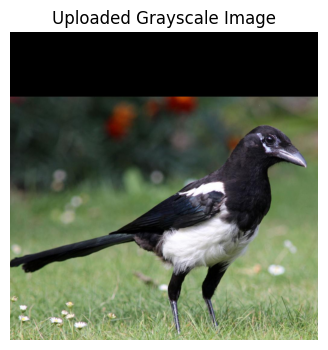

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


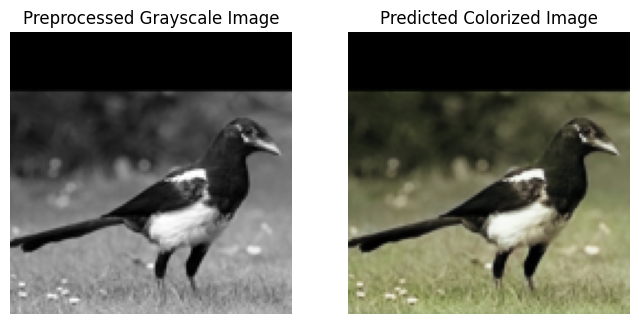

time: 6.37 s (started: 2025-03-20 19:46:27 +00:00)


In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))

image = Image.open(io.BytesIO(uploaded[filename]))

# Display the uploaded image
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.title("Uploaded Grayscale Image")
plt.show()

# Preprocess the image
preprocessed_image = preprocess_single_image(image)

# Predict the colorized image
predicted_image = model.predict(preprocessed_image)[0]
predicted_image = np.clip(predicted_image, 0, 1)

plt.figure(figsize=(8, 4))

# Original grayscale input
plt.subplot(1, 2, 1)
plt.imshow(preprocessed_image[0, :, :, 0], cmap="gray")
plt.axis("off")
plt.title("Preprocessed Grayscale Image")

# Predicted color image
plt.subplot(1, 2, 2)
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Colorized Image")

plt.show()